## This notebook helps to find out different methods for replacing NaN values in dataset

In [180]:
import numpy as np
import pandas as pd

In [181]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
#checking the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
#checking the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
#since the age is numerical, we can check percentage of missing
df['Age'].isnull().mean()

0.19865319865319866

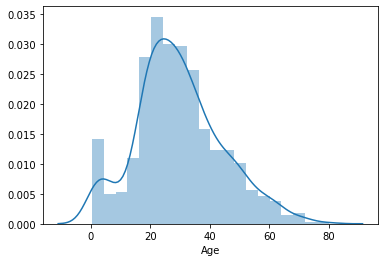

In [185]:
#check the Age distribution
import seaborn as sns
sns.distplot(df['Age'])

## 1. Median/Mean/Mode Imputation on numerical data

In [186]:
#seeing the distribution, we can replace the null values by median.
#function for replacement
def impute_age_median(df,variable):
    df[variable+'_median'] = np.where(df[variable].isnull(),df[variable].median(),df[variable])

In [187]:
#calling the function to execute
impute_age_median(df,'Age')

In [188]:
#check once again
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0


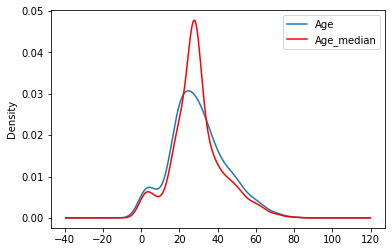

In [189]:
#after this, check the distribution of both before and after imputation
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = plt.subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
ax.legend(loc='best')

## 2. Random sample imputation

In [190]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
df['Age'].sample(1)

370    25.0
Name: Age, dtype: float64

In [192]:
#here, we are replacing NaN values with random sampled values
def impute_age_sample(df,variable):
    df[variable + '_median'] = df[variable].fillna(df[variable].median())
    df[variable + '_random'] = df[variable]                                        
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)   #sampled from the non-null values of the column
    random_sample.index = df[df[variable].isnull()].index                                      #assigning the index to replaced values
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample                           #assigning new repalced values to those indexes

In [193]:
impute_age_sample(df,'Age')

In [194]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


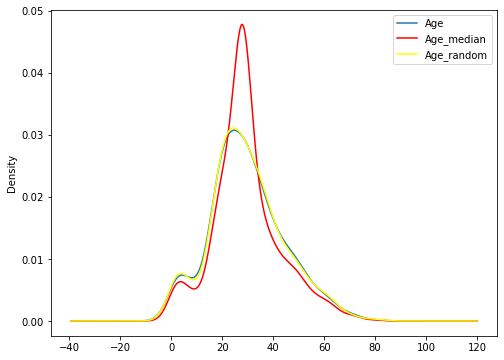

In [195]:
#checking the distribution for the median, random sampled and original distribution
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',color='red',ax=ax)
df['Age_random'].plot(kind='kde',color='yellow',ax=ax)
ax.legend()

### From the above plot, we can conclude that original distribution matches with the random sampling distribution, hence that is selected.

## 3. Capturing NaN values with new feature
### used when the data is not completely missing at random
### this method helps us to find alternative NaN values (mean/median) in the original column
### also, helps to show the importance of missingness as 0/1 in the new column

In [196]:
feature_df = pd.read_csv('../input/titanic/train.csv',usecols=['Age','Fare','Survived'])
feature_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [197]:
#creating new column (feature) in the dataframe
feature_df['Age_NaN'] = np.where(feature_df['Age'].isnull(),1,0)

#also replacing the NaN in the original 'Age' column with the median values
feature_df['Age'] = feature_df['Age'].fillna(df['Age'].median())

In [198]:
#checking the dataframe
feature_df.head(6)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


## 4. End of Distribution Imputation

In [199]:
end_df = pd.read_csv('../input/titanic/train.csv',usecols=['Age','Fare','Survived'])
end_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


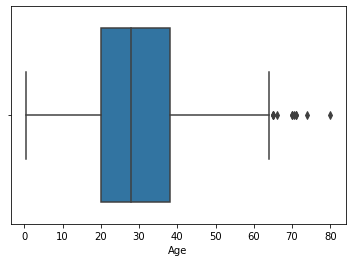

In [200]:
sns.boxplot(end_df['Age'])
#outliers are present as outside the distribution

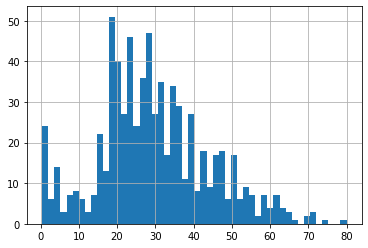

In [201]:
end_df['Age'].hist(bins=50)

In [202]:
extreme = end_df['Age'].mean() + 3*(end_df['Age'].std())
extreme

73.27860964406095

In [203]:
def age_end_impute(df,variable):
    end_df[variable+'_median'] = end_df['Age'].fillna(end_df['Age'].median())
    end_df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [204]:
age_end_impute(end_df,'Age')

In [205]:
end_df.head()

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


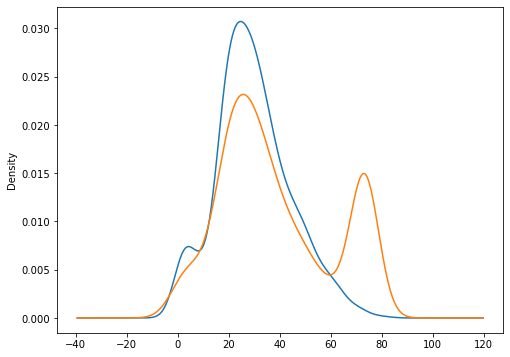

In [206]:
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
end_df['Age'].plot(kind='kde',ax=ax)
end_df['Age_end_distribution'].plot(kind='kde',ax=ax)

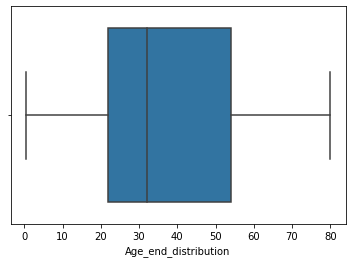

In [207]:
sns.boxplot(end_df['Age_end_distribution'])
#this helps to avoid the outliers present in the original data

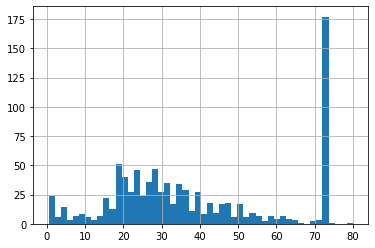

In [208]:
end_df['Age_end_distribution'].hist(bins=50)
#since more values are replaced by extreme, it became the mode and it eliminated the outliers

## 5. Arbitrary value imputation
### found from the kaggle competition, NaN values are replaced by any value

In [209]:
df=pd.read_csv("../input/titanic/train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [210]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [211]:
impute_nan(df,'Age')

In [212]:
df.head(6)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
